In [28]:
#!pip install pytest-warnings
#!pip freeze
#!pip install numpy = 1.26.4
#!pip install pandas=2.1.4
#!pip install matplotlib
#!pip install seaborn

In [43]:
import warnings
warnings.filterwarnings("ignore")

In [44]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

# step 1: importing dataset and inspect dataset

In [45]:
tweets=pd.read_csv("D:/New folder/tweets.csv")
tweets.head()

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


In [46]:
tweets.shape

(11370, 5)

In [47]:
tweets.describe()

,id,target
count,11370.000000,11370.000000
mean,5684.500000,0.185928
std,3282.380615,0.389066
min,0.000000,0.000000
25%,2842.250000,0.000000
50%,5684.500000,0.000000
75%,8526.750000,0.000000
max,11369.000000,1.000000


In [48]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11370 entries, 0 to 11369
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        11370 non-null  int64 
 1   keyword   11370 non-null  object
 2   location  7952 non-null   object
 3   text      11370 non-null  object
 4   target    11370 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 444.3+ KB


In [49]:
tweets.isnull().sum()/tweets.shape[0]*100

id           0.000000
keyword      0.000000
location    30.061566
text         0.000000
target       0.000000
dtype: float64

# step2: Data cleaning


In [50]:
cols=['id','keyword','keyword','text','target']
for i in cols:
    tweets[i].fillna('None',inplace= True)


In [51]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11370 entries, 0 to 11369
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        11370 non-null  int64 
 1   keyword   11370 non-null  object
 2   location  7952 non-null   object
 3   text      11370 non-null  object
 4   target    11370 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 444.3+ KB


In [52]:
tweets.head()

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


In [53]:
# import visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<function matplotlib.pyplot.show(close=None, block=None)>

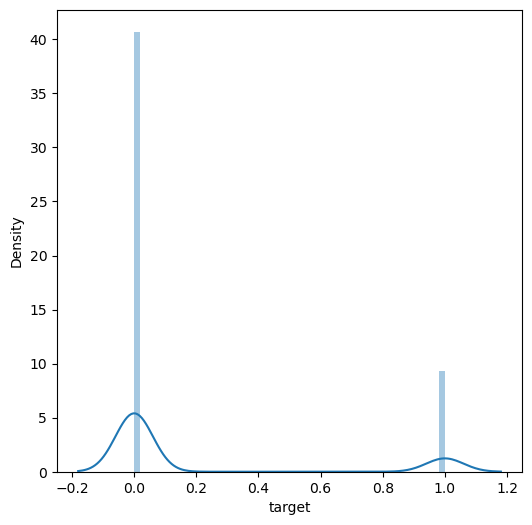

In [54]:
# checking target is normally distributed
plt.figure(figsize=[6,6])
sns.distplot(tweets['target'])
plt.show

### we can check skewness for target

In [55]:
print("skewness",tweets['target'].skew())
print('kurtosis',tweets['target'].kurt())

skewness 1.614778588161701
kurtosis 0.6076167385358846


### we can see skewness is greater than 1
hence we can transfer data for that variable

In [56]:
#log transfermation
tweets['target']=np.log(tweets["target"])

In [59]:
print("skewness",tweets['target'].skew())
print('kurtosis',tweets['target'].kurt())

skewness nan
kurtosis nan


- Drop id column
- convert location datatype into object

In [60]:
tweets.drop("id",axis=1,inplace=True)

In [61]:
tweets[['location']]=tweets[['location']].astype('object')

In [65]:
null_cols=tweets.columns[tweets.isnull().any()]
null_cols

Index(['location'], dtype='object')

In [67]:
for i in null_cols:
    if tweets[i].dtype == np.float64 or tweets[i].dtype == np.int64:
        tweets[i].fillna(tweets[i].mean(),inplace =True)
    else:
        tweets[i].fillna(tweets[i].mode()[0],inplace =True)

In [68]:
tweets.isnull().sum()

keyword     0
location    0
text        0
target      0
dtype: int64

In [69]:
print(tweets)

                     keyword  \
0                     ablaze   
1                     ablaze   
2                     ablaze   
3                     ablaze   
4                     ablaze   
5                     ablaze   
6                     ablaze   
7                     ablaze   
8                     ablaze   
9                     ablaze   
10                    ablaze   
11                    ablaze   
12                    ablaze   
13                    ablaze   
14                    ablaze   
15                    ablaze   
16                    ablaze   
17                    ablaze   
18                    ablaze   
19                    ablaze   
20                    ablaze   
21                    ablaze   
22                    ablaze   
23                    ablaze   
24                    ablaze   
25                    ablaze   
26                    ablaze   
27                    ablaze   
28                    ablaze   
29                    ablaze   
30      